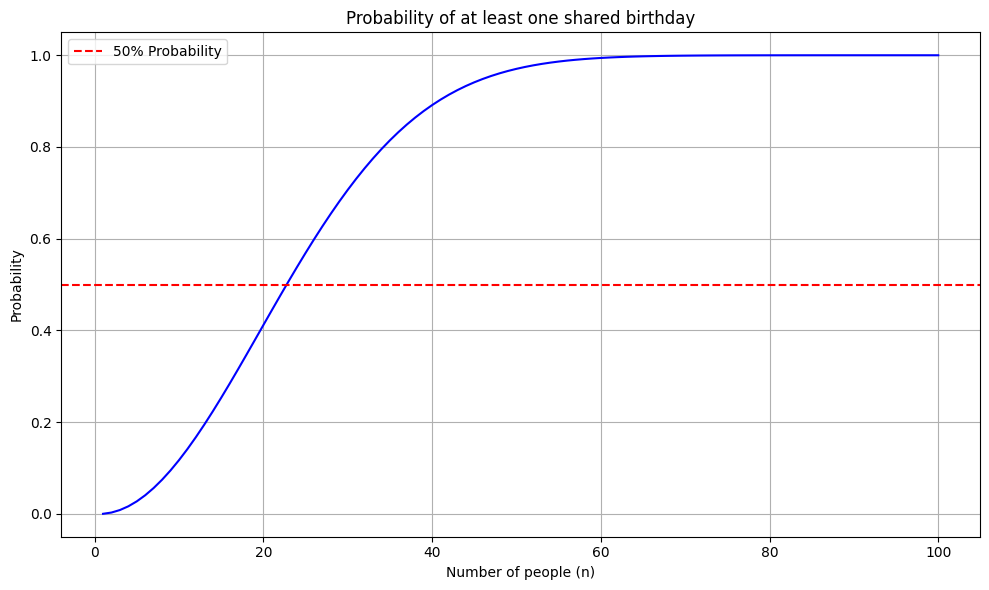

In [1]:
import matplotlib.pyplot as plt

def birthday_probability(n):
    prob_no_match = 1.0
    for i in range(n):
        prob_no_match *= (365 - i) / 365
    return 1 - prob_no_match

# Compute probabilities for group sizes from 1 to 100
group_sizes = list(range(1, 101))
probabilities = [birthday_probability(n) for n in group_sizes]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(group_sizes, probabilities, color='blue')
plt.title('Probability of at least one shared birthday')
plt.xlabel('Number of people (n)')
plt.ylabel('Probability')
plt.grid(True)
plt.axhline(y=0.5, color='red', linestyle='--', label='50% Probability')
plt.legend()
plt.tight_layout()
plt.show()

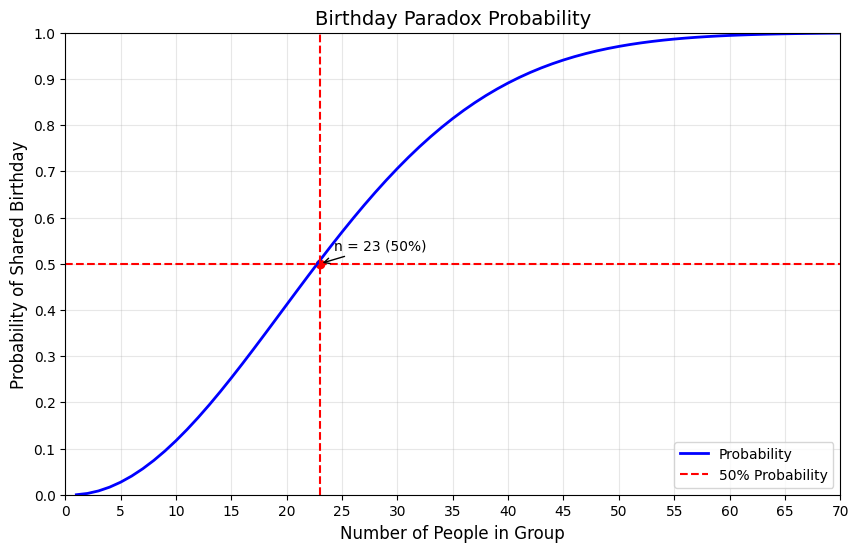

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def birthday_probability(n, days=365):
    """Calculate the probability of at least two people sharing a birthday in a group of size n."""
    if n < 2:
        return 0.0
    prob_unique = 1.0
    for i in range(1, n):
        prob_unique *= (days - i) / days
    return 1 - prob_unique

# Calculate probabilities for groups from 1 to 70 people
group_sizes = np.arange(1, 71)
probabilities = np.array([birthday_probability(n) for n in group_sizes])  # Convert to NumPy array

# Find where probability crosses 50%
fifty_percent_index = np.argmax(probabilities >= 0.5)
fifty_percent_n = group_sizes[fifty_percent_index]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(group_sizes, probabilities, 'b-', linewidth=2, label='Probability')
plt.axhline(y=0.5, color='r', linestyle='--', label='50% Probability')
plt.axvline(x=fifty_percent_n, color='r', linestyle='--')
plt.scatter([fifty_percent_n], [0.5], color='r')

# Annotate the 50% point
plt.annotate(f'n = {fifty_percent_n} (50%)', 
             xy=(fifty_percent_n, 0.5), 
             xytext=(10, 10), 
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->"))

# Format the plot
plt.title('Birthday Paradox Probability', fontsize=14)
plt.xlabel('Number of People in Group', fontsize=12)
plt.ylabel('Probability of Shared Birthday', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc='lower right')
plt.xticks(np.arange(0, 71, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlim(0, 70)
plt.ylim(0, 1)

plt.show()

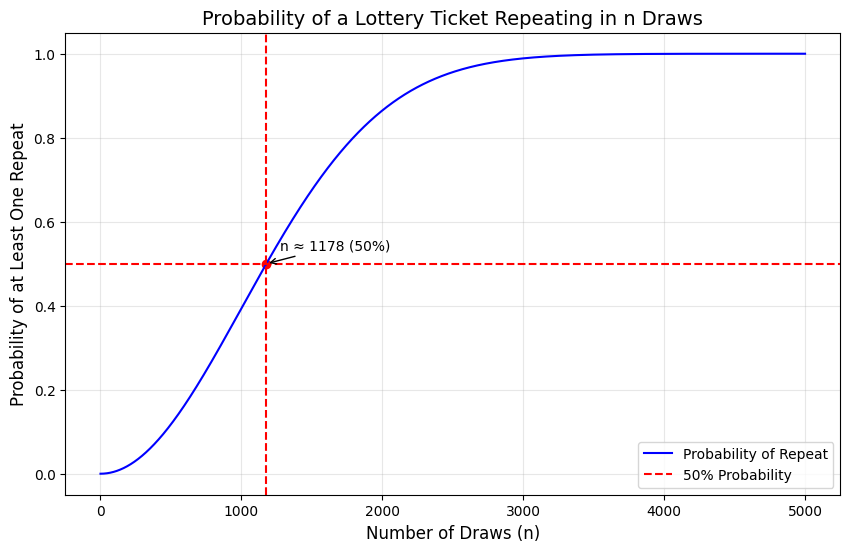

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def probability_repeat(n, tickets=1_000_000):
    """Probability of at least one repeated number in n draws."""
    if n <= 1:
        return 0.0
    # Using logarithms to avoid numerical overflow
    log_prob_unique = 0.0
    for i in range(n):
        log_prob_unique += np.log1p(-i / tickets)
    prob_unique = np.exp(log_prob_unique)
    return 1 - prob_unique

# Compute for n from 1 to 5000 (adjustable)
n_values = np.arange(1, 5001)
probabilities = [probability_repeat(n) for n in n_values]

# Find where probability crosses 50% (approximate)
n_values_array = np.array(n_values)
probabilities_array = np.array(probabilities)
fifty_percent_n = n_values_array[np.argmax(probabilities_array >= 0.5)]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(n_values, probabilities, 'b-', label='Probability of Repeat')
plt.axhline(0.5, color='r', linestyle='--', label='50% Probability')
plt.axvline(fifty_percent_n, color='r', linestyle='--')
plt.scatter([fifty_percent_n], [0.5], color='r')

# Annotate the 50% mark
plt.annotate(
    f'n ≈ {fifty_percent_n} (50%)',
    xy=(fifty_percent_n, 0.5),
    xytext=(10, 10),
    textcoords='offset points',
    arrowprops=dict(arrowstyle="->")
)

# Formatting
plt.title('Probability of a Lottery Ticket Repeating in n Draws', fontsize=14)
plt.xlabel('Number of Draws (n)', fontsize=12)
plt.ylabel('Probability of at Least One Repeat', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
total_tickets = 1_000_000
num_simulations = 1000
max_draws = 1500

def has_duplicate(draws):
    return len(draws) != len(set(draws))

def monte_carlo_simulation(draws_count):
    duplicates = 0
    for _ in range(num_simulations):
        draws = np.random.randint(0, total_tickets, size=draws_count)
        if has_duplicate(draws):
            duplicates += 1
    return duplicates / num_simulations

def do_monte_carlo():
    draw_counts = np.arange(1, max_draws + 1)
    probabilities = [monte_carlo_simulation(n) for n in draw_counts]

    plt.figure(figsize=(14, 8))
    plt.bar(draw_counts, probabilities, color='skyblue', alpha=0.7, label='Monte Carlo Probability')
    plt.plot(draw_counts, probabilities, color='orange', linewidth=3, label='Cumulative Probability')

    plt.title('Probability of Duplicate Numbers in Lottery Draws (Monte Carlo Simulation)', fontsize=16)
    plt.xlabel('Number of Draws (n)', fontsize=14)
    plt.ylabel('Probability of Duplicate', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(fontsize=12)
    plt.xticks(np.arange(0, max_draws + 1, 200), rotation=45)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.axvline(x=1200, color='red', linestyle='--', alpha=0.7, label='~50% Chance Around n ≈ 1200')
    plt.axhline(y=0.5, color='green', linestyle='--', alpha=0.7, label='50% Probability Threshold')
    plt.legend()
    plt.show()

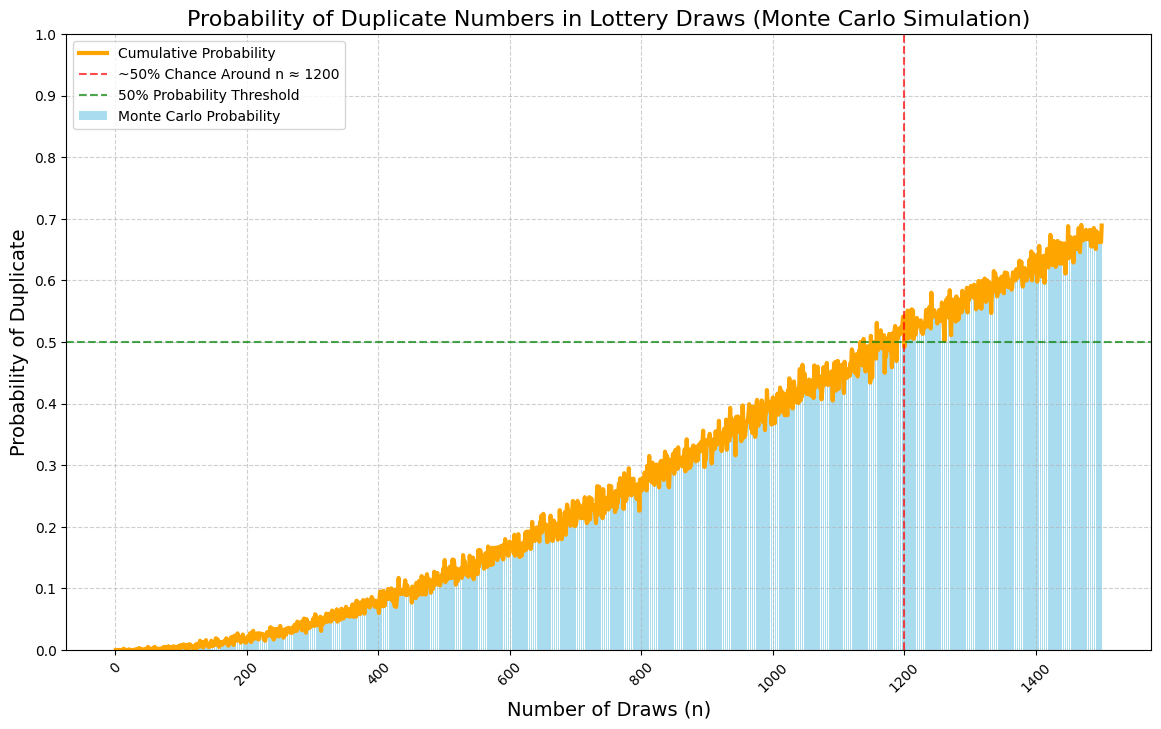

In [10]:
do_monte_carlo()

In [11]:
#plt.savefig(f"monte_carlo_repeat_ticket.png", dpi=150)

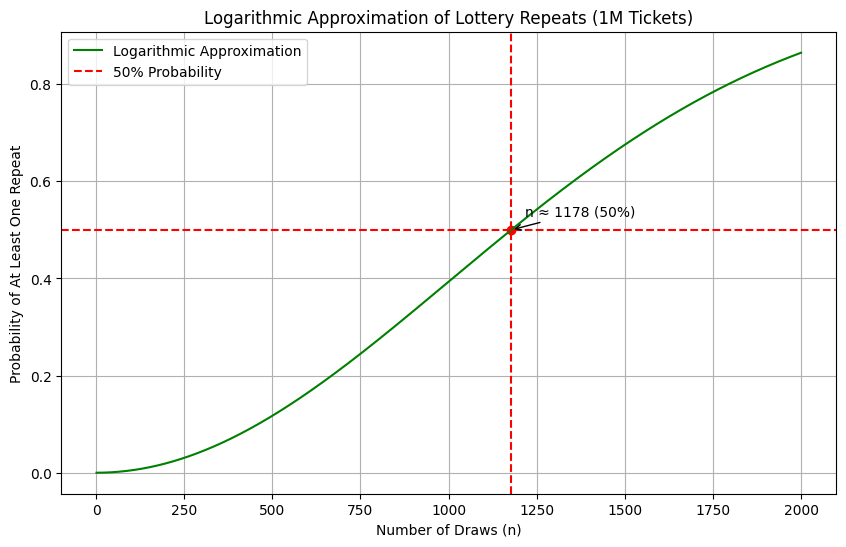

In [12]:
def log_approximation_repeat_probability(n, tickets=1_000_000):
    """Compute probability using logarithmic approximation (more efficient)."""
    if n <= 1:
        return 0.0
    # Using log to avoid numerical overflow
    log_prob_unique = 0.0
    for i in range(n):
        log_prob_unique += np.log1p(-i / tickets)
    prob_unique = np.exp(log_prob_unique)
    return 1 - prob_unique

# Compute for n=1 to 2000
n_values = np.arange(1, 2001)
probabilities_log = [log_approximation_repeat_probability(n) for n in n_values]

# Find where probability crosses 50%
fifty_percent_n = n_values[np.argmax(np.array(probabilities_log) >= 0.5)]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(n_values, probabilities_log, 'g-', label='Logarithmic Approximation')
plt.axhline(0.5, color='r', linestyle='--', label='50% Probability')
plt.axvline(fifty_percent_n, color='r', linestyle='--')
plt.scatter([fifty_percent_n], [0.5], color='r')
plt.annotate(
    f'n ≈ {fifty_percent_n} (50%)',
    xy=(fifty_percent_n, 0.5),
    xytext=(10, 10),
    textcoords='offset points',
    arrowprops=dict(arrowstyle="->")
)
plt.xlabel('Number of Draws (n)')
plt.ylabel('Probability of At Least One Repeat')
plt.title('Logarithmic Approximation of Lottery Repeats (1M Tickets)')
plt.grid(True)
plt.legend()
plt.show()

In [34]:
import numpy as np

# 2500 past numbers
past_draws = np.random.randint(1, 1_000_001, size=2500)                   # known past draws
my_pick = [np.random.choice(past_draws) for _ in range(1)]               # I pick 1% randomly

def simulate():    
    my_pick = [np.random.choice(past_draws) for _ in range(1)]               # I pick 1% randomly
    next_draw = np.random.randint(1, 1_000_001)                             # New lottery draw
    return next_draw in my_pick                                             # Did I win?

trials = 1_000_000
wins = sum(simulate() for _ in range(trials))
print(f"Win rate: {wins / trials:.8f} (Expected: {1/1_000_000:.8f})")

Win rate: 0.00000100 (Expected: 0.00000100)
